<a href="https://colab.research.google.com/github/LucianoC11/Data-Science---Coderhouse/blob/main/CICCONI_LUCIANO_ENTREGA_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre-entrega**

#Data Science I : Fundamentos para la Ciencia de Datos | Comisión 61155
19/06/24


#**Abstract**
El conjunto de datos seleccionado para este análisis contiene información detallada sobre los egresados de una universidad privada, abarcando carreras de grado, pregrado y posgrado. Este dataset incluye una variedad de variables geográficas, demográficas y académicas, como la provincia de residencia, el año de graduación, el programa de estudios y el promedio final obtenido.

Mi análisis se centrará en realizar un estudio descriptivo y exploratorio de estos datos, identificando patrones y tendencias significativas. Utilizaré técnicas de clasificación y segmentación para agrupar a los egresados según distintas características, y exploraré las relaciones entre variables para identificar correlaciones significativas.

El principal objetivo de este estudio es determinar qué grupo de personas presenta mayor volumen de egresados, a qué carreras pertenecen, a qué generación corresponden, en qué provincia estudiaron y con qué promedio finalizaron. Además, busco identificar cuáles de estas variables tienen la mayor correlación. Este análisis proporcionará insights valiosos para mejorar las estrategias educativas y de apoyo en la universidad, optimizando así las tasas de graduación y el rendimiento académico de los estudiantes.

.

**Diccionario**
1. ID_ALUMNO : Identificación de alumno
2. ID_LEGAJO : Identificación de alumno-carrera
3. KEY_ALUMNO : Identificación única que combina las dos anteriores debido a que un alumno puede estudiar varias carreras
4. Fecha Ingreso : Fecha en la que ingresó a la carrera
5. Año_Ingreso : Año en que ingresó a la carrera
6. Fecha Egreso : Fecha en la que egresó de la carrera
7. Año_Egreso : Año en que egresó de la carrera
8. Duracion_Real : Duración real de la carrera (en cuanto tiempo el alumno la finalizó)
9. Duracion_Regla : Duración estimada de la carrera
10. Duración_Reglas_Años : Duración estimada de la carrera en años
11. FECHA_NACIMIENTO : Fecha de nacimiento del alumno
12. EDAD : Edad del alumno
13. GENERACION : Generación (según edad)
14. SEXO_TXT : Género del alumno
15. Cohorte : Cohorte (Plan de estudios)
16. Tipo Titulo : Tipo de titulación, si es de grado, pregrado o posgrado
17. Modalidad : Modalidad de estudio del alumno
18. Carrera : Carrera del alumno
19. Período Inicio : Período académico de inicio de carrera
20. Período_Num_Inicio : Período académico de inicio de carrera en número
21. Tipo_Inicio : Tipo de período en el que inicio, si fue a principio de año, en la segunda mitad o en verano
22. Promedio CA : Promedio con el que finalizó su carrera
23. Loc Dom. : Localidad domicilio del alumno
24. Prov Dom. : Provincia domicilio del alumno
25. Tipo_Dom : Tipo domicilio, si es nacional o extranjero
26. TRABAJA : Estado laboral del alumno, si trabaja o no
27. PROVINCIA : Provincia de la sede donde realizó su carrera
28. LOCALIDAD : Localidad de la sede donde realizó su carrera
29. CLASIF_LOCAL : Clasificación de la localidad, si pertenece a una





#Importación de datos y librerias

In [ ]:
import pandas as pd ## se importa las librerias y creo un dataframe

In [ ]:
url = 'https://github.com/LucianoC11/Data-Science---Coderhouse/raw/main/Dataset_Egresados_2019_2024.xlsx'

df = pd.read_excel(url, engine="openpyxl")


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as sm
import plotly.express as px
import numpy as np
import matplotlib.axes as ax

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

In [ ]:
# validamos la correcta importación de los datos
df.head()

,ID_ALUMNO,ID_LEGAJO,KEY_ALUMNO,Fecha Ingreso,Año_Ingreso,Fecha Egreso,Año_Egreso,Duracion_Real,Duracion_Regla,Duración_Reglas_Años,...,Período_Num_Inicio,Tipo_Inicio,Promedio CA,Loc Dom.,Prov Dom.,Tipo_Dom,TRABAJA,PROVINCIA,LOCALIDAD,CLASIF_LOCAL
0,3194,1,3194-1,2013-07-16,2013,2018-09-19,2018,5,De 2 a 3 años,2.5,...,1,Principio de Año,5.40,Capital Federal,Ciudad Autonoma De Buenos Aires,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
1,1170,2,1170-2,2014-05-08,2014,2019-07-24,2019,5,De 2 a 3 años,2.5,...,1,Principio de Año,6.57,Laboulaye,Cordoba,Argentino,Si,CORDOBA,LABOULAYE,Ciudad Pequeña
2,2804,3,2804-3,2016-03-09,2016,2018-12-08,2018,3,De 2 a 3 años,2.5,...,1,Principio de Año,15.86,Mendoza,Mendoza,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
3,9695,4,9695-4,2016-03-04,2016,2019-03-01,2019,3,De 2 a 3 años,2.5,...,1,Principio de Año,7.03,San Salvador De Jujuy,Jujuy,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
4,4424,5,4424-5,2014-11-27,2014,2018-12-17,2018,4,De 2 a 3 años,2.5,...,1,Principio de Año,7.93,Moron,Buenos Aires,Argentino,No,CORDOBA,CÓRDOBA,Ciudad Principal


#Preprocesamiento de datos

In [ ]:
# mediante el método describe hacemos un análisis básico del dataframe
df.describe()

,ID_ALUMNO,ID_LEGAJO,Fecha Ingreso,Año_Ingreso,Fecha Egreso,Año_Egreso,Duracion_Real,Duración_Reglas_Años,FECHA_NACIMIENTO,EDAD,Cohorte,Período_Num_Inicio,Promedio CA
count,5723.000000,5723.000000,5723,5723.000000,5723,5723.000000,5723.000000,5723.000000,5706,5706.000000,5723.000000,5723.000000,5723.000000
mean,4957.240608,2862.000000,2015-08-21 17:25:43.036868864,2015.201118,2020-01-20 11:56:21.093831936,2019.403110,4.424078,3.574873,1983-06-11 18:59:28.547844416,41.009464,2015.566137,1.236065,8.288969
min,3.000000,1.000000,1999-06-11 00:00:00,1999.000000,2018-01-30 00:00:00,2018.000000,-2.000000,2.000000,1900-01-02 00:00:00,22.000000,1999.000000,0.000000,0.000000
25%,2519.500000,1431.500000,2013-07-25 00:00:00,2013.000000,2019-05-20 00:00:00,2019.000000,2.000000,2.500000,1977-09-06 00:00:00,34.000000,2013.000000,1.000000,6.470000
50%,4865.000000,2862.000000,2016-01-19 00:00:00,2016.000000,2019-11-13 00:00:00,2019.000000,4.000000,4.000000,1984-11-10 00:00:00,40.000000,2016.000000,1.000000,7.500000
75%,7453.500000,4292.500000,2017-12-20 00:00:00,2017.000000,2020-08-05 00:00:00,2020.000000,6.000000,4.000000,1990-12-13 00:00:00,47.000000,2018.000000,2.000000,8.560000
max,10000.000000,5723.000000,2023-04-20 00:00:00,2023.000000,2024-06-04 00:00:00,2024.000000,21.000000,4.000000,2002-02-05 00:00:00,124.000000,2024.000000,2.000000,32.200000
std,2866.311244,1652.232127,NaN,3.074898,NaN,1.114631,2.738573,0.684523,NaN,9.992420,3.156905,0.497121,3.322045


Observamos mediante .describe la existencia de nulos y valores para 'EDAD' de 124 y 32 para 'Promedio CA', por lo que, es necesario realizar correcciones

In [ ]:
# mediante el método info verificamos la composición del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID_ALUMNO             5723 non-null   int64         
 1   ID_LEGAJO             5723 non-null   int64         
 2   KEY_ALUMNO            5723 non-null   object        
 3   Fecha Ingreso         5723 non-null   datetime64[ns]
 4   Año_Ingreso           5723 non-null   int64         
 5   Fecha Egreso          5723 non-null   datetime64[ns]
 6   Año_Egreso            5723 non-null   int64         
 7   Duracion_Real         5723 non-null   int64         
 8   Duracion_Regla        5723 non-null   object        
 9   Duración_Reglas_Años  5723 non-null   float64       
 10  FECHA_NACIMIENTO      5706 non-null   datetime64[ns]
 11  EDAD                  5706 non-null   float64       
 12  GENERACION            5723 non-null   object        
 13  SEXO_TXT          

In [ ]:
# validamos la existencia de nulos y en qué columnas
null_columna = df.isnull().sum()
print (null_columna)

ID_ALUMNO                0
ID_LEGAJO                0
KEY_ALUMNO               0
Fecha Ingreso            0
Año_Ingreso              0
Fecha Egreso             0
Año_Egreso               0
Duracion_Real            0
Duracion_Regla           0
Duración_Reglas_Años     0
FECHA_NACIMIENTO        17
EDAD                    17
GENERACION               0
SEXO_TXT                 3
Cohorte                  0
Tipo Titulo              0
Modalidad                0
Carrera                  0
Período Inicio           0
Período_Num_Inicio       0
Tipo_Inicio              0
Promedio CA              0
Loc Dom.                 6
Prov Dom.                6
Tipo_Dom                 0
TRABAJA                  0
PROVINCIA                0
LOCALIDAD                0
CLASIF_LOCAL             0
dtype: int64


In [ ]:
# mediante dropna eliminamos los valores nulos de las columnas seleccionadas
df.dropna(subset=['FECHA_NACIMIENTO'])

,ID_ALUMNO,ID_LEGAJO,KEY_ALUMNO,Fecha Ingreso,Año_Ingreso,Fecha Egreso,Año_Egreso,Duracion_Real,Duracion_Regla,Duración_Reglas_Años,...,Período_Num_Inicio,Tipo_Inicio,Promedio CA,Loc Dom.,Prov Dom.,Tipo_Dom,TRABAJA,PROVINCIA,LOCALIDAD,CLASIF_LOCAL
0,3194,1,3194-1,2013-07-16,2013,2018-09-19,2018,5,De 2 a 3 años,2.5,...,1,Principio de Año,5.40,Capital Federal,Ciudad Autonoma De Buenos Aires,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
1,1170,2,1170-2,2014-05-08,2014,2019-07-24,2019,5,De 2 a 3 años,2.5,...,1,Principio de Año,6.57,Laboulaye,Cordoba,Argentino,Si,CORDOBA,LABOULAYE,Ciudad Pequeña
2,2804,3,2804-3,2016-03-09,2016,2018-12-08,2018,3,De 2 a 3 años,2.5,...,1,Principio de Año,15.86,Mendoza,Mendoza,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
3,9695,4,9695-4,2016-03-04,2016,2019-03-01,2019,3,De 2 a 3 años,2.5,...,1,Principio de Año,7.03,San Salvador De Jujuy,Jujuy,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
4,4424,5,4424-5,2014-11-27,2014,2018-12-17,2018,4,De 2 a 3 años,2.5,...,1,Principio de Año,7.93,Moron,Buenos Aires,Argentino,No,CORDOBA,CÓRDOBA,Ciudad Principal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,398,5719,398-5719,2012-02-24,2012,2018-03-08,2018,6,De 4 a 5 años,4.0,...,1,Principio de Año,7.51,Córdoba,Cordoba,Argentino,No,No aplica,CÓRDOBA,Ciudad Principal
5719,5575,5720,5575-5720,2013-07-25,2013,2018-02-28,2018,5,De 4 a 5 años,4.0,...,2,Mitad de Año,6.60,Córdoba,Cordoba,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal
5720,6883,5721,6883-5721,2016-01-26,2016,2018-06-19,2018,2,De 4 a 5 años,4.0,...,1,Principio de Año,5.83,San Fernando Del Valle De Catamarca,Catamarca,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal
5721,2227,5722,2227-5722,2015-03-09,2015,2018-06-08,2018,3,De 4 a 5 años,4.0,...,1,Principio de Año,8.23,Córdoba,Cordoba,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal


In [ ]:
df.dropna(subset=['Loc Dom.'])

,ID_ALUMNO,ID_LEGAJO,KEY_ALUMNO,Fecha Ingreso,Año_Ingreso,Fecha Egreso,Año_Egreso,Duracion_Real,Duracion_Regla,Duración_Reglas_Años,...,Período_Num_Inicio,Tipo_Inicio,Promedio CA,Loc Dom.,Prov Dom.,Tipo_Dom,TRABAJA,PROVINCIA,LOCALIDAD,CLASIF_LOCAL
0,3194,1,3194-1,2013-07-16,2013,2018-09-19,2018,5,De 2 a 3 años,2.5,...,1,Principio de Año,5.40,Capital Federal,Ciudad Autonoma De Buenos Aires,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
1,1170,2,1170-2,2014-05-08,2014,2019-07-24,2019,5,De 2 a 3 años,2.5,...,1,Principio de Año,6.57,Laboulaye,Cordoba,Argentino,Si,CORDOBA,LABOULAYE,Ciudad Pequeña
2,2804,3,2804-3,2016-03-09,2016,2018-12-08,2018,3,De 2 a 3 años,2.5,...,1,Principio de Año,15.86,Mendoza,Mendoza,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
3,9695,4,9695-4,2016-03-04,2016,2019-03-01,2019,3,De 2 a 3 años,2.5,...,1,Principio de Año,7.03,San Salvador De Jujuy,Jujuy,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
4,4424,5,4424-5,2014-11-27,2014,2018-12-17,2018,4,De 2 a 3 años,2.5,...,1,Principio de Año,7.93,Moron,Buenos Aires,Argentino,No,CORDOBA,CÓRDOBA,Ciudad Principal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,398,5719,398-5719,2012-02-24,2012,2018-03-08,2018,6,De 4 a 5 años,4.0,...,1,Principio de Año,7.51,Córdoba,Cordoba,Argentino,No,No aplica,CÓRDOBA,Ciudad Principal
5719,5575,5720,5575-5720,2013-07-25,2013,2018-02-28,2018,5,De 4 a 5 años,4.0,...,2,Mitad de Año,6.60,Córdoba,Cordoba,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal
5720,6883,5721,6883-5721,2016-01-26,2016,2018-06-19,2018,2,De 4 a 5 años,4.0,...,1,Principio de Año,5.83,San Fernando Del Valle De Catamarca,Catamarca,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal
5721,2227,5722,2227-5722,2015-03-09,2015,2018-06-08,2018,3,De 4 a 5 años,4.0,...,1,Principio de Año,8.23,Córdoba,Cordoba,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal


In [ ]:
# definimos edad máxima para evitar errores en el dataframe
df = df[df['EDAD'] <= 90]

In [ ]:
# validamos mediante .min y .max los valores de la columna edad
df['EDAD'].min()

22.0

In [ ]:
df['EDAD'].max()

79.0

In [ ]:
# definimos a la columna float 'Promedio CA' como int para evitar
df['Promedio CA'] = df['Promedio CA'].round().astype(int)

In [ ]:
# definimos como valor máximo para 'Promedio CA' = 10, si es mayor o igual a 10 nos devuelve 10
df['Promedio CA'] = df['Promedio CA'].apply(lambda x: 10 if x >= 10 else x)


In [ ]:
# verificamos mediante .max la funcionalidad de la línea anterior
df['Promedio CA'].max()

10

In [ ]:
df

,ID_ALUMNO,ID_LEGAJO,KEY_ALUMNO,Fecha Ingreso,Año_Ingreso,Fecha Egreso,Año_Egreso,Duracion_Real,Duracion_Regla,Duración_Reglas_Años,...,Período_Num_Inicio,Tipo_Inicio,Promedio CA,Loc Dom.,Prov Dom.,Tipo_Dom,TRABAJA,PROVINCIA,LOCALIDAD,CLASIF_LOCAL
0,3194,1,3194-1,2013-07-16,2013,2018-09-19,2018,5,De 2 a 3 años,2.5,...,1,Principio de Año,5,Capital Federal,Ciudad Autonoma De Buenos Aires,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
1,1170,2,1170-2,2014-05-08,2014,2019-07-24,2019,5,De 2 a 3 años,2.5,...,1,Principio de Año,7,Laboulaye,Cordoba,Argentino,Si,CORDOBA,LABOULAYE,Ciudad Pequeña
2,2804,3,2804-3,2016-03-09,2016,2018-12-08,2018,3,De 2 a 3 años,2.5,...,1,Principio de Año,10,Mendoza,Mendoza,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
3,9695,4,9695-4,2016-03-04,2016,2019-03-01,2019,3,De 2 a 3 años,2.5,...,1,Principio de Año,7,San Salvador De Jujuy,Jujuy,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
4,4424,5,4424-5,2014-11-27,2014,2018-12-17,2018,4,De 2 a 3 años,2.5,...,1,Principio de Año,8,Moron,Buenos Aires,Argentino,No,CORDOBA,CÓRDOBA,Ciudad Principal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,398,5719,398-5719,2012-02-24,2012,2018-03-08,2018,6,De 4 a 5 años,4.0,...,1,Principio de Año,8,Córdoba,Cordoba,Argentino,No,No aplica,CÓRDOBA,Ciudad Principal
5719,5575,5720,5575-5720,2013-07-25,2013,2018-02-28,2018,5,De 4 a 5 años,4.0,...,2,Mitad de Año,7,Córdoba,Cordoba,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal
5720,6883,5721,6883-5721,2016-01-26,2016,2018-06-19,2018,2,De 4 a 5 años,4.0,...,1,Principio de Año,6,San Fernando Del Valle De Catamarca,Catamarca,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal
5721,2227,5722,2227-5722,2015-03-09,2015,2018-06-08,2018,3,De 4 a 5 años,4.0,...,1,Principio de Año,8,Córdoba,Cordoba,Argentino,Si,No aplica,CÓRDOBA,Ciudad Principal


Observamos que en la columna 'Provincia' existen valores como SIN DATOS o NO Aplica, esto se debe a que son modalidades presenciales cursadas en Córdoba, es por ello que se reemplazaran por dicho nombre

In [ ]:
df['PROVINCIA'].replace(['SIN DATOS', 'No Aplica', 'No aplica', 'SENIOR'], 'CORDOBA', inplace=True)

In [ ]:
df

,ID_ALUMNO,ID_LEGAJO,KEY_ALUMNO,Fecha Ingreso,Año_Ingreso,Fecha Egreso,Año_Egreso,Duracion_Real,Duracion_Regla,Duración_Reglas_Años,...,Período_Num_Inicio,Tipo_Inicio,Promedio CA,Loc Dom.,Prov Dom.,Tipo_Dom,TRABAJA,PROVINCIA,LOCALIDAD,CLASIF_LOCAL
0,3194,1,3194-1,2013-07-16,2013,2018-09-19,2018,5,De 2 a 3 años,2.5,...,1,Principio de Año,5,Capital Federal,Ciudad Autonoma De Buenos Aires,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
1,1170,2,1170-2,2014-05-08,2014,2019-07-24,2019,5,De 2 a 3 años,2.5,...,1,Principio de Año,7,Laboulaye,Cordoba,Argentino,Si,CORDOBA,LABOULAYE,Ciudad Pequeña
2,2804,3,2804-3,2016-03-09,2016,2018-12-08,2018,3,De 2 a 3 años,2.5,...,1,Principio de Año,10,Mendoza,Mendoza,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
3,9695,4,9695-4,2016-03-04,2016,2019-03-01,2019,3,De 2 a 3 años,2.5,...,1,Principio de Año,7,San Salvador De Jujuy,Jujuy,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
4,4424,5,4424-5,2014-11-27,2014,2018-12-17,2018,4,De 2 a 3 años,2.5,...,1,Principio de Año,8,Moron,Buenos Aires,Argentino,No,CORDOBA,CÓRDOBA,Ciudad Principal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5718,398,5719,398-5719,2012-02-24,2012,2018-03-08,2018,6,De 4 a 5 años,4.0,...,1,Principio de Año,8,Córdoba,Cordoba,Argentino,No,CORDOBA,CÓRDOBA,Ciudad Principal
5719,5575,5720,5575-5720,2013-07-25,2013,2018-02-28,2018,5,De 4 a 5 años,4.0,...,2,Mitad de Año,7,Córdoba,Cordoba,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
5720,6883,5721,6883-5721,2016-01-26,2016,2018-06-19,2018,2,De 4 a 5 años,4.0,...,1,Principio de Año,6,San Fernando Del Valle De Catamarca,Catamarca,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal
5721,2227,5722,2227-5722,2015-03-09,2015,2018-06-08,2018,3,De 4 a 5 años,4.0,...,1,Principio de Año,8,Córdoba,Cordoba,Argentino,Si,CORDOBA,CÓRDOBA,Ciudad Principal


<Axes: >

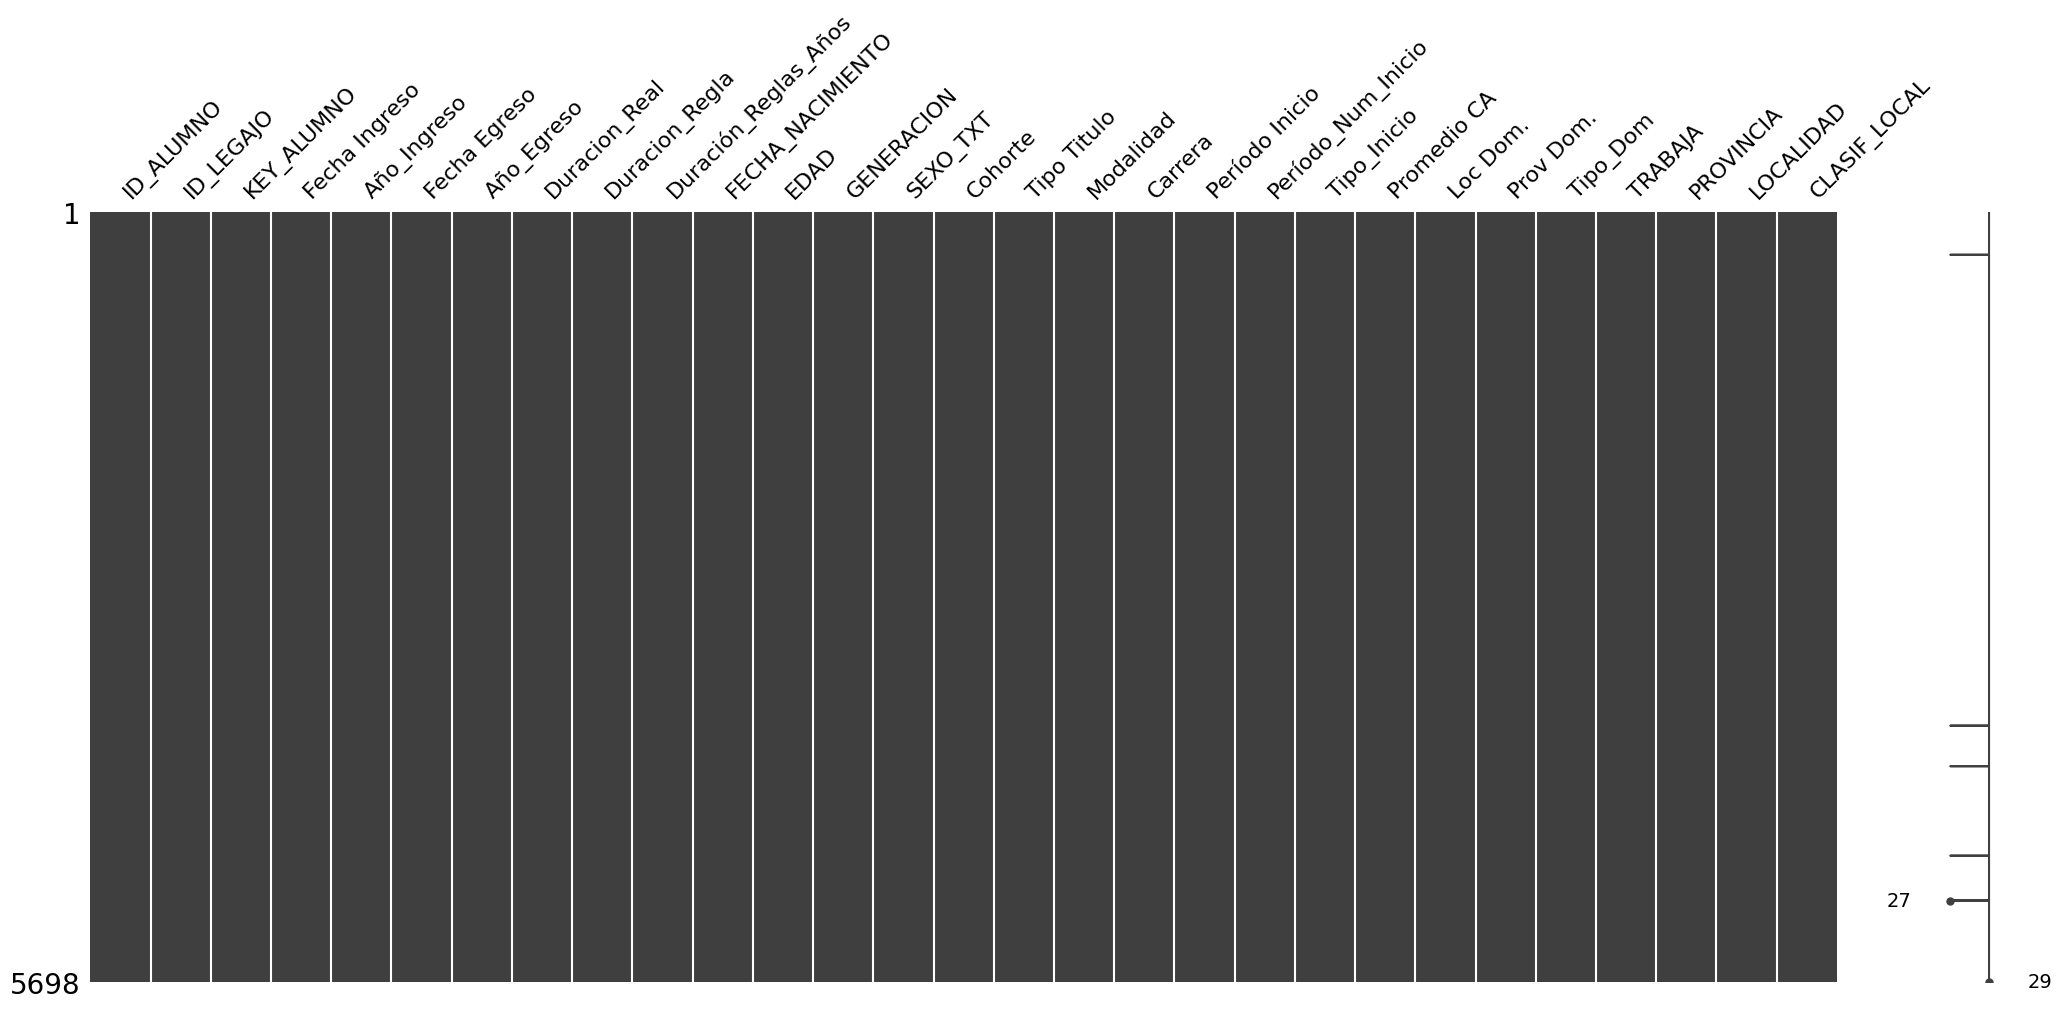

In [ ]:
# mediante matriz de nulos se corrobora la correción del dataframe
msno.matrix(df)

#Análisis exploratorio de los datos
##Preguntas e hipótesis
1. ¿Qué carreras tienen mayor alumnos graduados?
2. ¿Cual es la distribución de graduación para cada clase de estudio?
3. ¿En qué año existen mayor número de egresados?
4. Según el momento del año en el que iniciaron ¿Cuál tiene mayor egresados?
5. ¿Influye si el alumno trabaja o no, mientras estudia?
5. ¿Cuál es la distribución de egresados por modalidad?
6. La provincia donde se realice el cursado influye en la graduación
8. ¿Cuál es la distribución por generación?
9. ¿Cuál es la distribución por género de egresados?
10. ¿Éxiste alguna relación entre el promedio y la duración real de la carrera?
11. ¿Existe alguna relación entre la edad y el promedio al egresar?

##Univariados

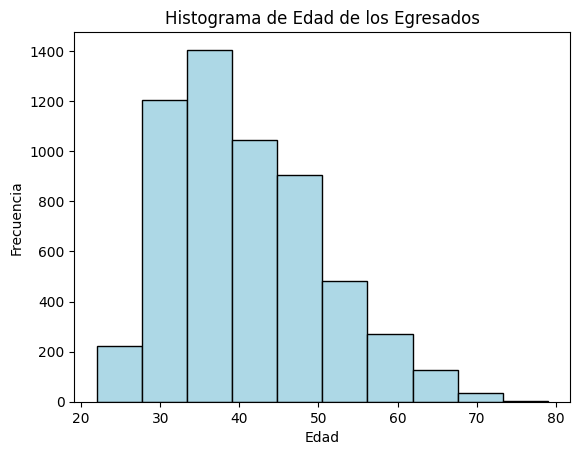

In [ ]:
plt.hist(df['EDAD'], bins=10, edgecolor='black', color='lightblue')
plt.title('Histograma de Edad de los Egresados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Se observa que el mayor número de egresados tienen entre 30 y 45 años

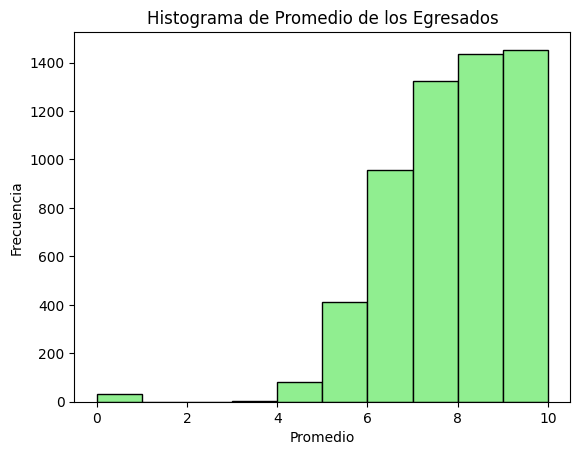

In [ ]:
plt.hist(df['Promedio CA'], bins=10, edgecolor='black', color='lightgreen')
plt.title('Histograma de Promedio de los Egresados')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.show()

Se observa que el rendimiento académico general, marcado por el promedio al finalizar la carrera es bastante positivo, agrupando la mayor cantidad de alumnos entre 7 y 10

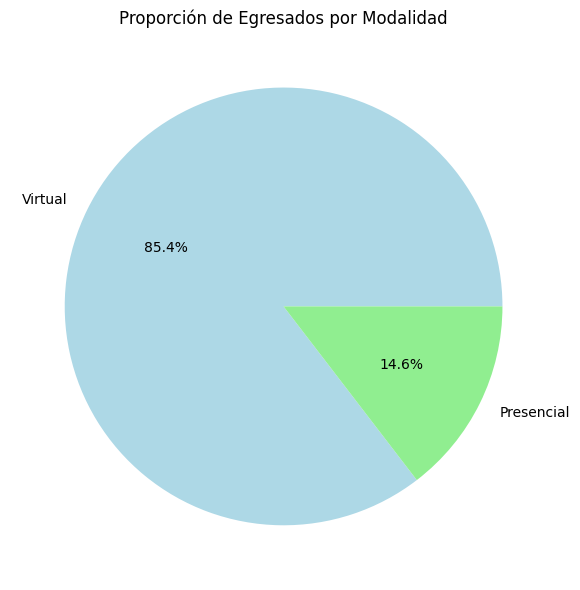

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(modalidad_counts, labels=modalidad_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Proporción de Egresados por Modalidad')
plt.tight_layout()
plt.show()

Se observa que la participación de las modalidades virtuales en la universidad es seis veces mayor a las presenciales

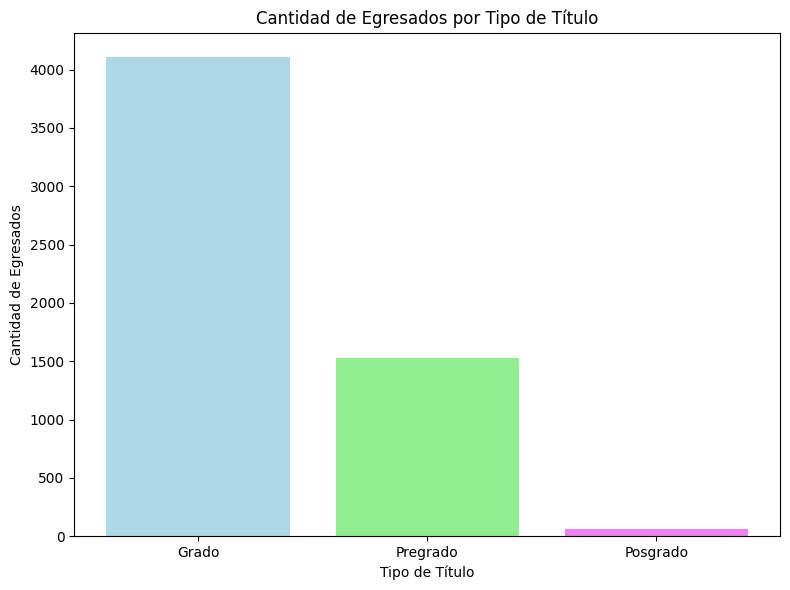

In [ ]:
clase_counts = df['Tipo Titulo'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(clase_counts.index, clase_counts.values, color=['lightblue', 'lightgreen', 'violet'])
plt.title('Cantidad de Egresados por Tipo de Título')
plt.xlabel('Tipo de Título')
plt.ylabel('Cantidad de Egresados')
plt.tight_layout()
plt.show()

Se observa mayor cantidad de egresados de carreras de grado por sobre las demás clases de estudio

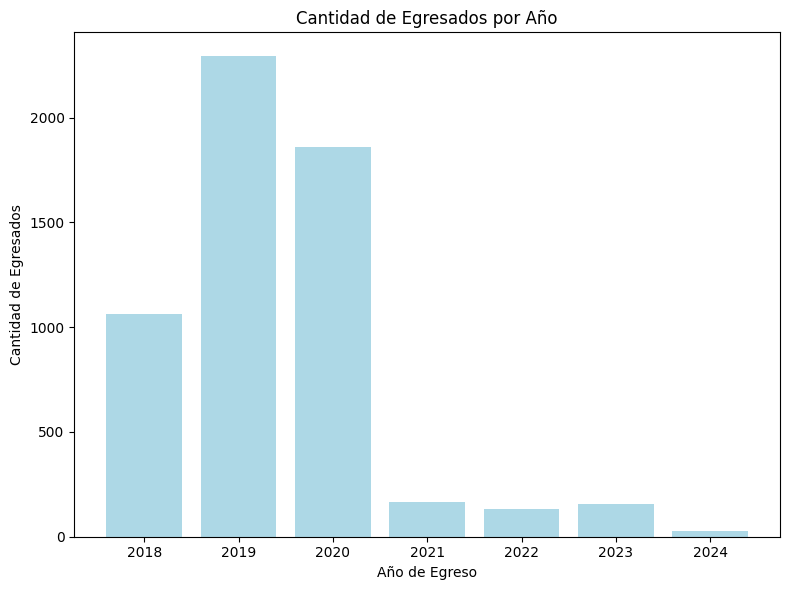

In [ ]:
año_counts = df['Año_Egreso'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(año_counts.index, año_counts.values, color=['lightblue'])
plt.title('Cantidad de Egresados por Año')
plt.xlabel('Año de Egreso')
plt.ylabel('Cantidad de Egresados')
plt.tight_layout()
plt.show()

Se observa una caída importante de egresados posterior al 2020 distinta  la tendencia positiva que se venia dando antes de dicho año

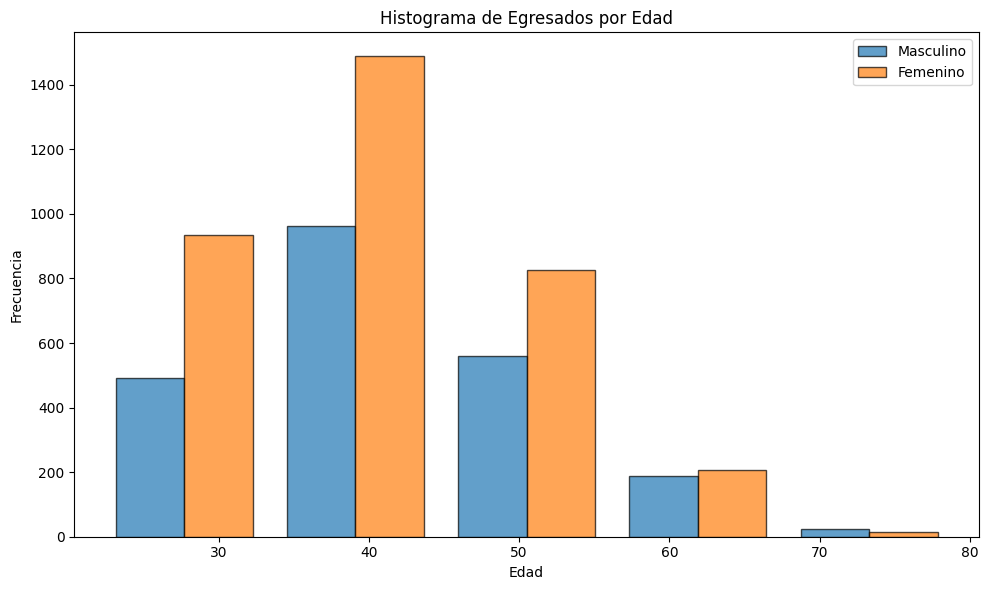

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['SEXO_TXT'] == 'Masculino']['EDAD'], df[df['SEXO_TXT'] == 'Femenino']['EDAD']],
         bins=5, edgecolor='black', alpha=0.7, label=['Masculino', 'Femenino'])
plt.title('Histograma de Egresados por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

Se observa una mayor cantidad de mujeres egresadas en todos los rangos etarios a excepción del de mayor edad

In [ ]:
recuento_carrera = df['Carrera'].value_counts().reset_index()
recuento_carrera.columns = ['Carrera', 'Cantidad de Registros']
print(recuento_carrera)

                                              Carrera  Cantidad de Registros
0                                            Abogacía                   1548
1                                    Contador Público                    660
2                                          Escribanía                    476
3                                          Procurador                    440
4   Martillero, Corredor Público Y Corredor Inmobi...                    435
..                                                ...                    ...
60                         Licenciatura En Periodismo                      2
61  Tecnicatura Universitaria En Redes Informática...                      1
62              Licenciatura En Emprendimiento- Ciclo                      1
63  Especializacion En Finanzas Corporativas Y Mer...                      1
64                   Maestría En Innovación Educativa                      1

[65 rows x 2 columns]


Se realizó una tabla para poder verificar que carreras tenian mayor cantidad de egresados, esto debido a que no es posible representarlo visualmente a través de un gráfico, se observa que las 3 principales carreras son Abogacía, Contador Público y Escribanía

##Bivariados

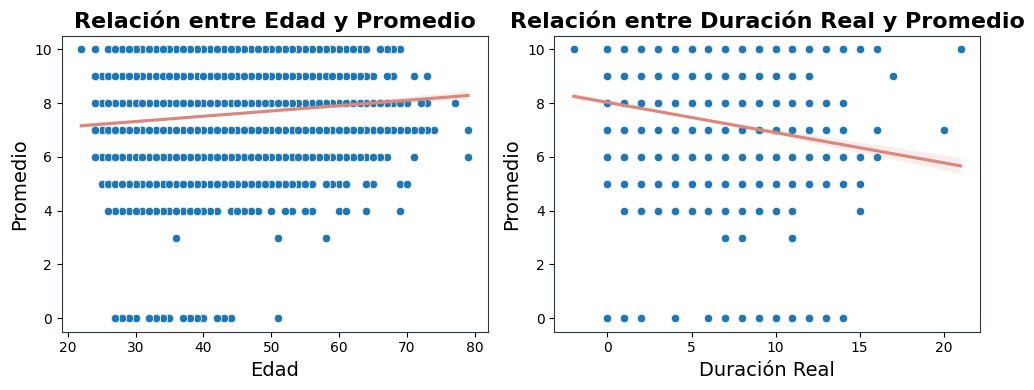

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico 1: Edad vs Promedio
sns.scatterplot(x='EDAD', y='Promedio CA', data=df, ax=ax1)
sns.regplot(x='EDAD', y='Promedio CA', data=df, ax=ax1, scatter=False, color='#D98880')
ax1.set_title('Relación entre Edad y Promedio', fontsize=16, fontweight='bold')
ax1.set_xlabel('Edad', fontsize=14)
ax1.set_ylabel('Promedio', fontsize=14)

for spine in ax1.spines.values():
    spine.set_edgecolor('#283747')

# Gráfico 2: Duración Real vs Promedio
sns.scatterplot(x='Duracion_Real', y='Promedio CA', data=df, ax=ax2)
sns.regplot(x='Duracion_Real', y='Promedio CA', data=df, ax=ax2, scatter=False, color='#D98880')
ax2.set_title('Relación entre Duración Real y Promedio', fontsize=16, fontweight='bold')
ax2.set_xlabel('Duración Real', fontsize=14)
ax2.set_ylabel('Promedio', fontsize=14)

for spine in ax2.spines.values():
    spine.set_edgecolor('#283747')

plt.tight_layout()
plt.show()

Podemos concluir que no existe una correlación significativa entre las variables en análisis

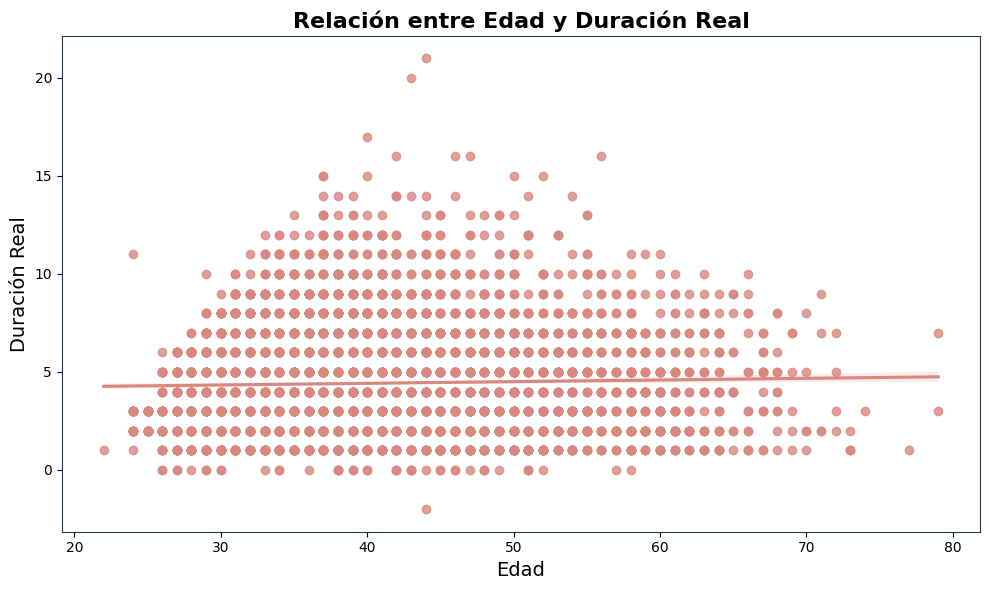

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='EDAD', y='Duracion_Real', data=df, color='#D98880')
plt.title('Relación entre Edad y Duración Real', fontsize=16, fontweight='bold')
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Duración Real', fontsize=14)

# Ajustar el color de los ejes y de los bordes
for spine in plt.gca().spines.values():
    spine.set_edgecolor('#283747')

plt.tight_layout()
plt.show()

Podemos concluir que no existe una correlación significativa entre las variables en análisis